EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\dlproject\dlproj\data\raw\training_set_rel3.csv", sep='\t')

# Show structure
print(df.columns)
print(df.head())

# Summary stats
print(df['essay_set'].value_counts())
print(df['domain1_score'].describe())

# Length of essays
df['essay_length'] = df['essay'].apply(lambda x: len(x.split()))
print(df['essay_length'].describe())


Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')
   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

 

In [4]:
missing = df.isnull().sum()
print(missing[missing > 0])


rater3_domain1    12848
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64


In [5]:
df_set2 = df[df['essay_set'] == 2]
df_set7 = df[df['essay_set'] == 7]
df_set8 = df[df['essay_set'] == 8]
df_others = df[df['essay_set'].isin([1, 3, 4, 5, 6])]


In [6]:
print(df.nunique().sort_values())


rater3_trait4         4
rater3_trait5         4
rater1_domain2        4
rater2_domain2        4
domain2_score         4
rater3_trait6         4
rater3_trait2         5
rater3_trait1         5
rater3_trait3         5
rater2_trait6         6
rater2_trait5         6
rater1_trait6         6
rater1_trait5         6
rater1_trait4         7
rater1_trait1         7
rater2_trait1         7
rater2_trait2         7
rater2_trait3         7
rater2_trait4         7
rater1_trait2         7
rater1_trait3         7
essay_set             8
rater3_domain1       16
rater2_domain1       29
rater1_domain1       30
domain1_score        53
essay_length        822
essay             12972
essay_id          12976
dtype: int64


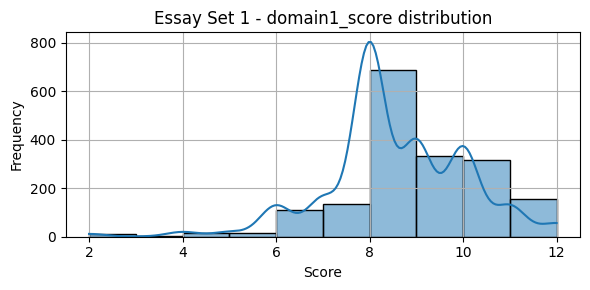

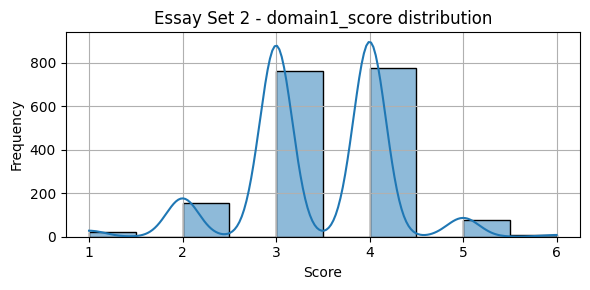

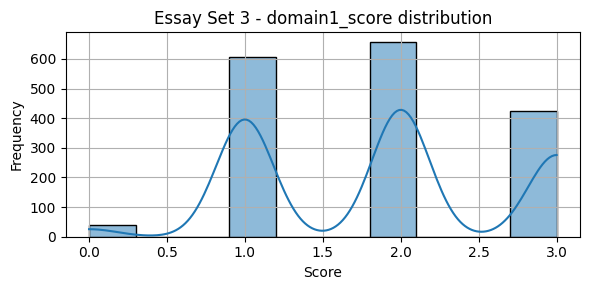

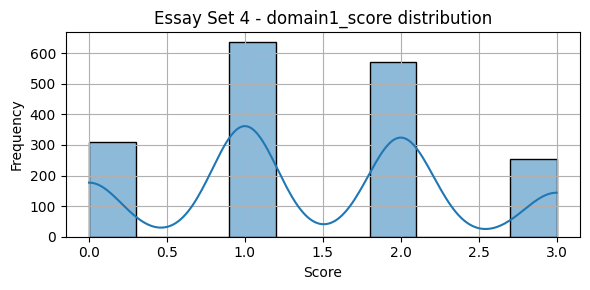

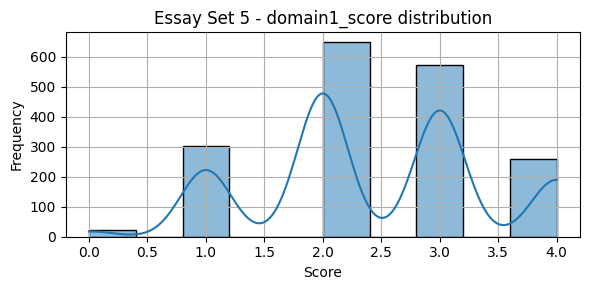

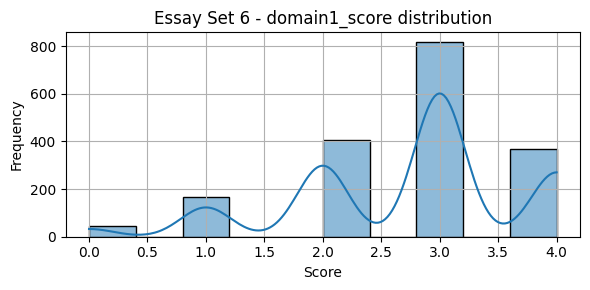

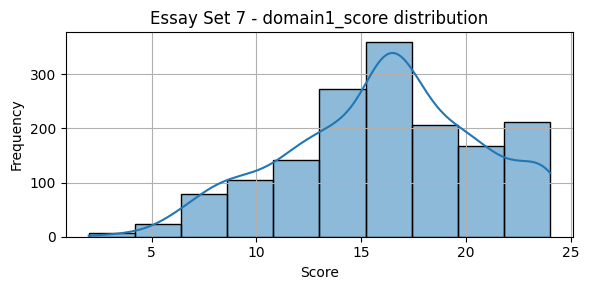

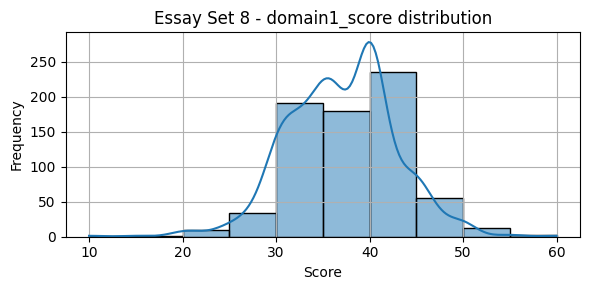

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot score distribution per essay_set
for set_id in sorted(df['essay_set'].unique()):
    plt.figure(figsize=(6, 3))
    sns.histplot(df[df['essay_set'] == set_id]['domain1_score'], kde=True, bins=10)
    plt.title(f"Essay Set {set_id} - domain1_score distribution")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
df['char_length'] = df['essay'].apply(len)
df['avg_word_length'] = df['char_length'] / df['essay_length']

# Optional: sentence count
df['sentence_count'] = df['essay'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))

# Summary
print(df[['essay_length', 'char_length', 'avg_word_length', 'sentence_count']].describe())


       essay_length   char_length  avg_word_length  sentence_count
count  12976.000000  12976.000000     12976.000000    12976.000000
mean     222.695284   1215.971640         5.445804       13.531828
std      175.925283    958.310727         0.389767       12.955179
min        2.000000      8.000000         3.857143        0.000000
25%       98.000000    527.000000         5.212121        5.000000
50%      163.000000    900.500000         5.459459        9.000000
75%      307.000000   1670.000000         5.697878       19.000000
max     1064.000000   6098.000000        18.120000      643.000000


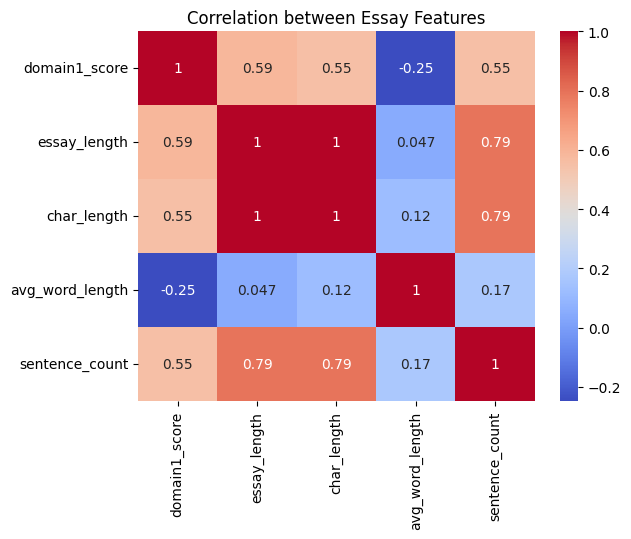

In [9]:
numeric_cols = ['domain1_score', 'essay_length', 'char_length', 'avg_word_length', 'sentence_count']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Essay Features")
plt.show()


In [10]:
duplicates = df[df.duplicated('essay')]
print(f"Number of duplicate essays: {len(duplicates)}")


Number of duplicate essays: 4


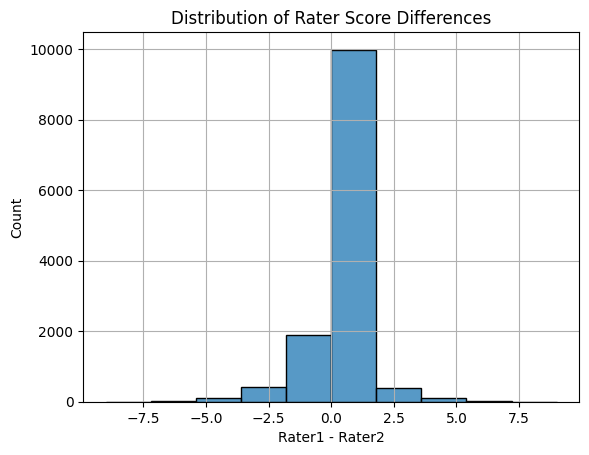

In [11]:
df['rater_diff'] = df['rater1_domain1'] - df['rater2_domain1']
sns.histplot(df['rater_diff'].dropna(), bins=10)
plt.title("Distribution of Rater Score Differences")
plt.xlabel("Rater1 - Rater2")
plt.grid(True)
plt.show()
